## Author-  Vishnu Sai Rao S. Lokhande

The purpose of this study is to visualise and see how changing the regularisation constant affects svm classification. SVM with linear kernel has been used.

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import time

# Dataset
Iris data set has been used. The number of features are brought down to 2 from 4. The number of classes are brought down to 2 from 3. Hence this is a binary classification problem with only two features.

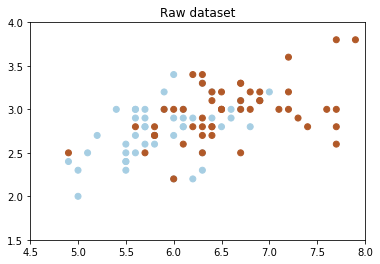

In [112]:
#Preparing a binary class dataset with only two features

iris = load_iris()
X = iris.data
Y = iris.target
X = X[:, :2]
X = X[Y > 0]
Y = Y[Y > 0]
Y -= 1
plt.close('all')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, label = 1)
plt.xlim(4.5,8)
plt.ylim(1.5,4)
plt.title('Raw dataset')
plt.show()


SVM cross-validation accuracy and computation time have been measured for different regularisation constants.

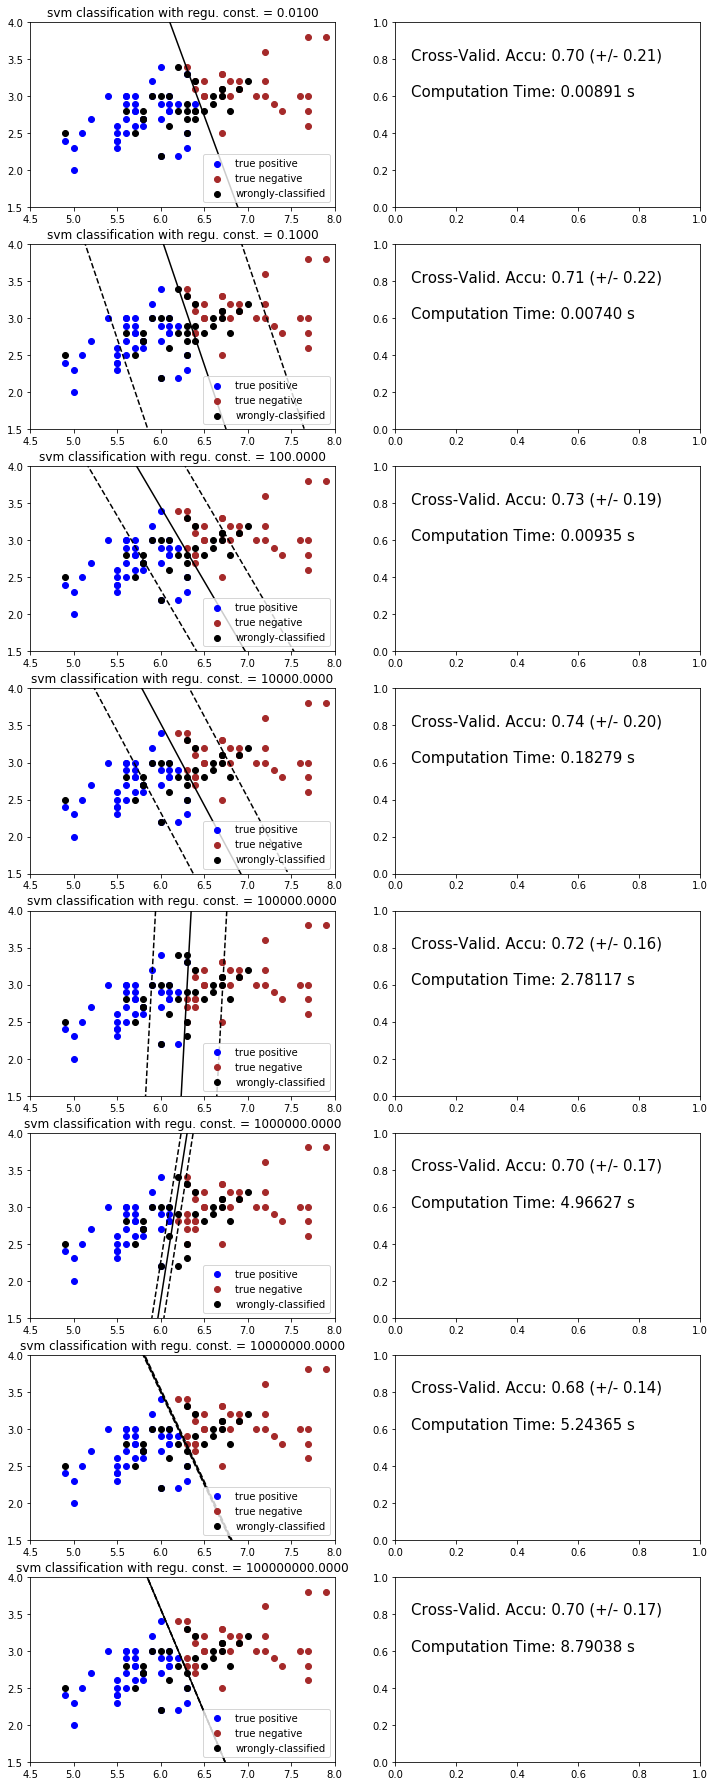

In [113]:
plt.close('all')
C = [1e-2,1e-1,1e2, 1e4,1e5,1e6,1e7,1e8] # regularisation parameter
classifiers = []
accuracies = []
Time_complexity = []

plt.figure(figsize=(6*2,4*len(C)))
i = 1
for c in C:
    start = time.clock()
    clf = SVC(C=c, kernel='linear')
    clf.fit(X, Y)
    classifiers.append([c, clf])
    Y_new = clf.predict(X) 
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracies.append([scores.mean(),scores.std()])
    end = time.clock()
    #print(start,end)
    duration = end-start
    Time_complexity.append([duration])
    
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(5, 10, num = 100)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    #plot the margins
    plt.subplot(len(C),2,i)
    i = i + 1
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    
    #plot the data points
    y1 = ((Y == 0) & (Y_new == 0))
    y2 = ((Y == 1) & (Y_new == 1))
    y3 = (((Y == 0) & (Y_new == 1)) | ((Y == 1) & (Y_new == 0)))
    plt.scatter(X[y1,0],X[y1,1], color = 'blue', label = 'true positive')
    plt.scatter(X[y2,0],X[y2,1], color = 'brown', label = 'true negative')
    plt.scatter(X[y3,0],X[y3,1], color = 'black', label = 'wrongly-classified')
    plt.legend(loc='lower right')
    plt.title('svm classification with regu. const. = %0.4f' % c)
    
    #plt.scatter(X[:, 0], X[:, 1], c=Y_new, cmap=plt.cm.Paired)
    
    plt.xlim(4.5,8)
    plt.ylim(1.5,4)
    
    # Model accuracy measurements
    plt.subplot(len(C),2,i)
    plt.text(0.05,0.8,("Cross-Valid. Accu: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)), fontsize=15)
    plt.text(0.05,0.6,("Computation Time: %0.5f s" % (duration)), fontsize=15)
    i = i + 1

plt.show()




# Observations

## 1. Classification plots
It is observed that as the regularisation constant is increased, the margin of the svm classifier reduces. We find that the first plot has a very small regu. const. and it's margin is so large that it could not be captured in the plot. The margin gradually reduces till it reaches the last plot where the regu. const. is very high and thus the classifier margin is most minimal.

## 2. Cross-Validation Accuracy
Accuracy increases as we increase the regu. constant until it reaches a maximum and then it decreases. The initial low accuracy implies that the classifier is poor because of it's large margin. Accuracy reduces after reaching a peak because the model starts to overfit and therefore begins to lose it's generalisation ability.

## 3. Computation time
The computation time seems to increase as we increase the regularisation constant